In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Mini-Project-1\Data-raw\recomendationData.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,73,47,36,20.879744,82.002744,6.502985,202.935536,rice
1,95,35,42,21.770462,80.319644,7.038096,226.655537,rice
2,71,43,35,23.004459,82.320763,7.840207,263.964248,rice
3,93,57,39,26.491096,80.158363,6.980401,242.864034,rice
4,91,57,39,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,113,32,31,26.774637,66.413269,6.780064,177.774507,coffee
2196,86,25,32,27.417112,56.636362,6.086922,127.924610,coffee
2197,99,17,26,24.131797,67.225123,6.362608,173.322839,coffee
2198,110,19,28,26.272418,52.127394,6.758793,127.175293,coffee
2199,80,37,32,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.value_counts

<bound method DataFrame.value_counts of         N   P   K  temperature   humidity        ph    rainfall   label
0      73  47  36    20.879744  82.002744  6.502985  202.935536    rice
1      95  35  42    21.770462  80.319644  7.038096  226.655537    rice
2      71  43  35    23.004459  82.320763  7.840207  263.964248    rice
3      93  57  39    26.491096  80.158363  6.980401  242.864034    rice
4      91  57  39    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  113  32  31    26.774637  66.413269  6.780064  177.774507  coffee
2196   86  25  32    27.417112  56.636362  6.086922  127.924610  coffee
2197   99  17  26    24.131797  67.225123  6.362608  173.322839  coffee
2198  110  19  28    26.272418  52.127394  6.758793  127.175293  coffee
2199   80  37  32    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [6]:
df.size

17600

In [7]:
df.shape

(2200, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [11]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<AxesSubplot: >

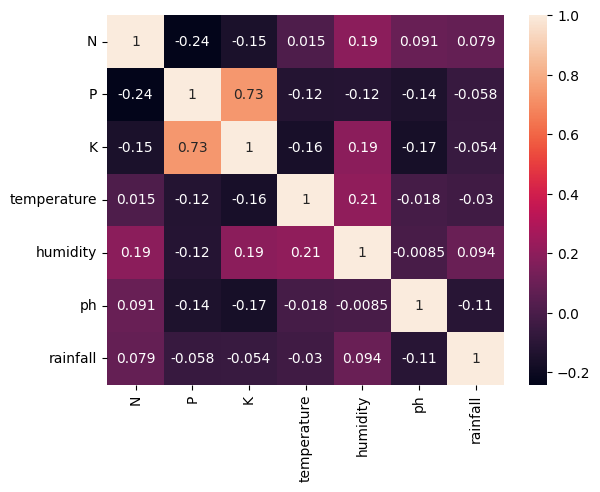

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
# Seperating features and target variables
features = df[['N','P','K','temperature','humidity','ph','rainfall']]
target = df['label']
labels = df['label']

In [17]:
acc = []
model = []

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=2)

DECISION TREE

In [20]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=5)
decisionTree.fit(x_train,y_train)

pred_values = decisionTree.predict(x_test)
x = metrics.accuracy_score(y_test,pred_values)
acc.append(x)
model.append('Decision Tree')

print("The accuracy score of Decision Tree is ", x*100)

The accuracy score of Decision Tree is  89.0909090909091


In [21]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(decisionTree,features,target,cv=5)

In [22]:
score

array([0.95227273, 0.93409091, 0.94090909, 0.93409091, 0.95227273])

In [24]:
import pickle

DT_pkl_file = r"C:\Users\hp\Desktop\Mini-Project-1\models\DecisionTree.pkl"

DT_model_pkl = open(DT_pkl_file,'wb')
pickle.dump(decisionTree, DT_model_pkl)
DT_model_pkl.close()

GAUSSIAN NAIVE BAYES

In [25]:
from sklearn.naive_bayes import GaussianNB

naiveBayes = GaussianNB()

naiveBayes.fit(x_train,y_train)
pred_values = naiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test,pred_values)
acc.append(x)
model.append("Naive Bayes")

print("The Accuracy score of Naive Bayes is ", x)

The Accuracy score of Naive Bayes is  0.990909090909091


In [26]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [27]:
score = cross_val_score(naiveBayes,features,target,cv=5)

In [28]:
score

array([0.99318182, 0.99772727, 0.99318182, 0.99545455, 0.99090909])

In [29]:
NB_pkl_file = r"C:\Users\hp\Desktop\Mini-Project-1\models\NBClassifier.pkl"

NB_model_pkl = open(NB_pkl_file,'wb')
pickle.dump(naiveBayes, NB_model_pkl)
NB_model_pkl.close()

SUPPORT VECTOR MACHINE (SVM)

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

svm = SVC(kernel='poly',degree=3,C=1)
svm.fit(x_train_norm,y_train)
pred_values = svm.predict(x_test_norm)

x = metrics.accuracy_score(y_test,pred_values)
acc.append(x)
model.append('SVM')

print("SVM's accuracy score is ",x)

print(classification_report(y_test,pred_values))

SVM's accuracy score is  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00    

In [31]:
score = cross_val_score(svm,features,target,cv=5)

In [32]:
score

array([0.98181818, 0.98409091, 0.98409091, 0.97727273, 0.97727273])

In [34]:
svm_pkl_file = r"C:\Users\hp\Desktop\Mini-Project-1\models\SVMClassifier.pkl"

svm_model_pkl = open(svm_pkl_file,'wb')
pickle.dump(svm, svm_model_pkl)
svm_model_pkl.close()